<a href="https://colab.research.google.com/github/MariaFragoso/Adivinha_Python/blob/main/Profissao_Analista_de_dados_M16_2_Exercicio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Análise de Dados: Análise Exploratória de Dados de Logística II
Caderno de **Exercícios**<br>
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

---

# **Tópicos**

<ol type="1">
  <li>Manipulação;</li>
  <li>Visualização;</li>
  <li>Storytelling.</li>
</ol>


---

# **Exercícios**

Este *notebook* deve servir como um guia para **você continuar** a construção da sua própria análise exploratória de dados. Fique a vontate para copiar os códigos da aula mas busque explorar os dados ao máximo. Por fim, publique seu *notebook* no [Kaggle](https://www.kaggle.com/).

---

# **Análise Exploratória de Dados de Logística**

## 1\. Contexto

Escreva uma breve descrição do problema.

A Loggi é uma startup unicórnio brasileira de tecnologia focada em logística. Ela começou entregando apenas documentos entre 2013 e 2014. Dois anos depois, entrou no segmento de e-commerce. E, desde 2017, tem atuado nas entregas de alimentos também.

“Somos unicórnio! Com investimentos de SoftBank, Microsoft, GGV Capital, Monashees e Kaszek e outros, a Loggi está avaliada em US$ 1 bilhão.” (https://www.loggi.com/carreiras/)

**2. Descrição do problema**

O Loggi Benchmark for Urban Deliveries (BUD) é um repositório do GitHub ([texto do link](https://)) com dados e códigos para problemas típicos que empresas de logística enfrentam: otimização das rotas de entrega, alocação de entregas nos veículos da frota com capacidade limitada, etc. Os dados são sintetizados de fontes públicas (IBGE, IPEA, etc.) e são representativos dos desafios que a startup enfrenta no dia a dia, especialmente com relação a sua escala.

A figura abaixo ilustra a dimensão do problema para a cidade do Rio de Janeiro. Na figura, cada ponto azul representa um ponto de entrega que deve ser alocado a um veículo para que a entrega seja realizada. Veículos pertencem a hubs de distribuição regionais espalhados pela cidade.



In [1]:
# importe todas as suas bibliotecas aqui, siga os padrões do PEP8:
#
# - 1º pacotes nativos do python: json, os, etc.;
# - 2º pacotes de terceiros: pandas, seabornm etc.;
# - 3º pacotes que você desenvolveu.

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


import numpy as np
import matplotlib.pyplot as plt
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



In [2]:
# importando os pacotes que iremos utilizar neste exercício:
# import os - feito na primeira célula
import json
import matplotlib as plt
import requests
# import pandas as pd - feito na primeira célula
import seaborn as sns
# import numpy as np - feito na primeira célula
import geopandas

## 2\. Pacotes e bibliotecas

In [3]:
# instalando o pacote não-nativo 'Geopandas':
!pip3 install geopandas;

## 3\. Exploração de dados

In [4]:
# faça o código de exploração de dados:
!wget -q "https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/dataset/deliveries.json" -O deliveries.json

with open('deliveries.json', mode='r', encoding='utf8') as file:
  data = json.load(file)




In [5]:
# - wrangling da estrutura;
import pandas as pd

deliveries_df = pd.DataFrame(data)
deliveries_df.head()

# - exploração do schema;
deliveries_df.info()

# - exploração dos dados;
deliveries_df.describe()
# - etc.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   name              199 non-null    object
 1   region            199 non-null    object
 2   origin            199 non-null    object
 3   vehicle_capacity  199 non-null    int64 
 4   deliveries        199 non-null    object
dtypes: int64(1), object(4)
memory usage: 7.9+ KB


,vehicle_capacity
count,199.0
mean,180.0
std,0.0
min,180.0
25%,180.0
50%,180.0
75%,180.0
max,180.0


In [6]:
# - exploração do schema;

deliveries_df.head(n=5)

,name,region,origin,vehicle_capacity,deliveries
0,cvrp-2-df-33,df-2,"{'lng': -48.05498915846707, 'lat': -15.8381445...",180,"[{'id': '313483a19d2f8d65cd5024c8d215cfbd', 'p..."
1,cvrp-2-df-73,df-2,"{'lng': -48.05498915846707, 'lat': -15.8381445...",180,"[{'id': 'bf3fc630b1c29601a4caf1bdd474b85', 'po..."
2,cvrp-2-df-20,df-2,"{'lng': -48.05498915846707, 'lat': -15.8381445...",180,"[{'id': 'b30f1145a2ba4e0b9ac0162b68d045c3', 'p..."
3,cvrp-1-df-71,df-1,"{'lng': -47.89366206897872, 'lat': -15.8051175...",180,"[{'id': 'be3ed547394196c12c7c27c89ac74ed6', 'p..."
4,cvrp-2-df-87,df-2,"{'lng': -48.05498915846707, 'lat': -15.8381445...",180,"[{'id': 'a6328fb4dc0654eb28a996a270b0f6e4', 'p..."


In [7]:
# limpando os dados da empresa Loggi:

deliveries_df = pd.DataFrame(data)
hub_origin_df = pd.json_normalize(deliveries_df["origin"])
deliveries_df = pd.merge(left=deliveries_df, right=hub_origin_df, how='inner', left_index=True, right_index=True)
deliveries_df = deliveries_df.drop("origin", axis=1)
deliveries_df = deliveries_df[["name", "region", "lng", "lat", "vehicle_capacity", "deliveries"]]
deliveries_df.rename(columns={"lng": "hub_lng", "lat": "hub_lat"}, inplace=True)
deliveries_exploded_df = deliveries_df[["deliveries"]].explode("deliveries")
deliveries_normalized_df = pd.concat([
  pd.DataFrame(deliveries_exploded_df["deliveries"].apply(lambda record: record["size"])).rename(columns={"deliveries": "delivery_size"}),
  pd.DataFrame(deliveries_exploded_df["deliveries"].apply(lambda record: record["point"]["lng"])).rename(columns={"deliveries": "delivery_lng"}),
  pd.DataFrame(deliveries_exploded_df["deliveries"].apply(lambda record: record["point"]["lat"])).rename(columns={"deliveries": "delivery_lat"}),
], axis= 1)
deliveries_df = deliveries_df.drop("deliveries", axis=1)
deliveries_df = pd.merge(left=deliveries_df, right=deliveries_normalized_df, how='right', left_index=True, right_index=True)
deliveries_df.reset_index(inplace=True, drop=True)

In [8]:
# checando se há algum valor NaN no DataFrame:
deliveries_df.isna().any()

,0
name,False
region,False
hub_lng,False
hub_lat,False
vehicle_capacity,False
delivery_size,False
delivery_lng,False
delivery_lat,False


## 4\. Manipulação

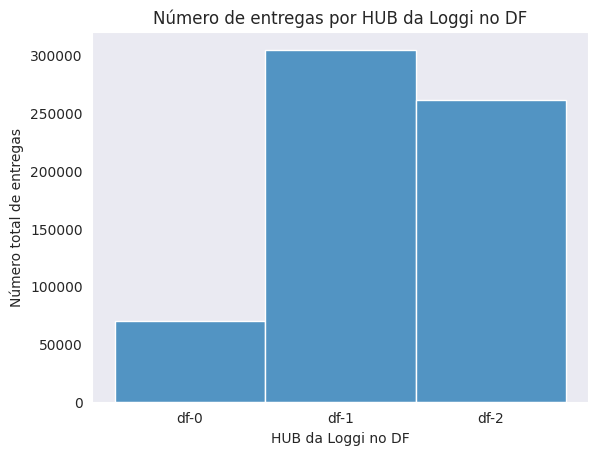

In [9]:
# faça o código de manipulação de dados:
# obtendo o número de entregas por HUB:
correlat_df = deliveries_df[['region','delivery_size']]
correlat_sorted = correlat_df.sort_values(['region','delivery_size'], ascending=True) # para os hubs ficarem em ordem crescente

with sns.axes_style('dark'):
  grafico = sns.histplot(data=correlat_sorted, x="region")
  grafico.set(title='Número de entregas por HUB da Loggi no DF', xlabel='HUB da Loggi no DF', ylabel='Número total de entregas')
# - enriquecimento;
# - controle de qualidade;
# - etc.



1.O gráfico mostra claramente que o HUB mais importante da Loggi no Distrito Federal é o df-1, sendo responsável pelo maior número de entregas. O df-0 é o com menos entregas da região e o df-1 segue em seguindo também com alto volume de entregas.

## 5\. Visualização

In [10]:
# faça o código de visualização de dados:
#
# - produza pelo menos duas visualizações;
# - adicione um pequeno texto com os insights encontrados;
# - etc.

# obtendo o volume total de entregas de cada HUB:
volume_entregas = correlat_df[['region','delivery_size']].groupby('region').agg('sum').reset_index()



<ipython-input-20-6216e7002f57>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  grafico = sns.barplot(data=volume_entregas, x="region", y="delivery_size", ci=None, palette="pastel")
<ipython-input-20-6216e7002f57>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  grafico = sns.barplot(data=volume_entregas, x="region", y="delivery_size", ci=None, palette="pastel")


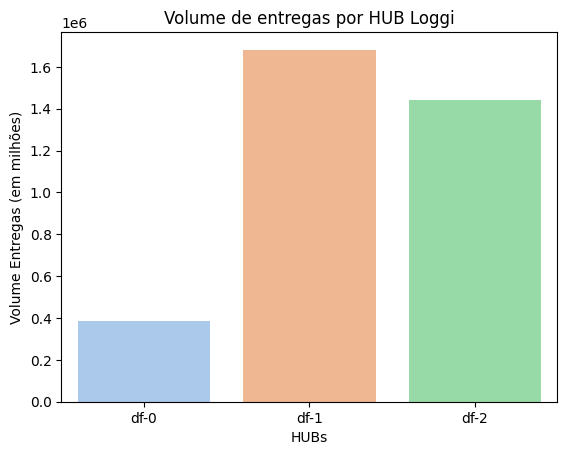

In [20]:
# visualizando os dados abaixo em um gráfico de barras:
grafico = sns.barplot(data=volume_entregas, x="region", y="delivery_size", ci=None, palette="pastel")
grafico.set(title='Volume de entregas por HUB Loggi', xlabel='HUBs', ylabel='Volume Entregas (em milhões)');

Insight: Assim como o primeiro gráfico, percebe-se que o df-1 segue com maior volume de entregas, seguido pelo pelo df-2.